<a href="https://colab.research.google.com/github/luyuliu/References/blob/main/Quantifying_Sampling_Bias_in_SafeGraph_Patterns_BlogPost_2019_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://global-uploads.webflow.com/5baafc2653bd67278f206724/5be267a03f7813daf821b31e_safegraph-logo-hidpi%403x-p-500.png)


# "What about bias in your dataset?" 

## Quantifying Sampling Bias in SafeGraph Patterns

--------------
**[Ryan Fox Squire](https://www.linkedin.com/in/ryanfoxsquire/) | Data Scientist, [SafeGraph](https://safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)**


Oct 2019

--------------
*Share this notebook: [Shareable Link](https://colab.research.google.com/drive/1u15afRytJMsizySFqA2EPlXSh3KTmNTQ#offline=true&sandboxMode=true
)*


## Introduction: "What about bias in your dataset?"

SafeGraph Patterns measures foot-traffic patterns to 3.6MM commercial points-of-interest from over 45 MM mobile devices in the United States and provides a monumental window into American commerce. SafeGraph data users look through this window to ask detailed questions about consumer behavior. 
<br/><br/>

![alt text](https://user-images.githubusercontent.com/6432906/67054597-f33e9a80-f0f9-11e9-81e2-777d78ef36d9.png)

###### Image Credit: [123RF Stock Photo ](https://www.123rf.com/profile_elenabsl)
<br/><br/>

A common question we hear from SafeGraph Patterns customers is “What about bias in your dataset?”. "Does your panel really represent the true American public?". "How do we know that your panel isn't oversampling wealthier people?".  This is the kind of sophisticated data skepticism we ***love*** to hear.  A key part of [SafeGraph’s vision](https://blog.safegraph.com/safegraph-vision-and-values-circa-2017-d188d4185df2/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) is to *“Seek the Truth About the World...Of course, data can never be 100% true, but we should strive to make it 100% true.”* 

And although SafeGraph Patterns aggregates data from ~ 10% of devices in the United States (a very impressive sample, if we don't say so ourselves!) this sample is not a perfect representative subset of the population. Like all samples, the SafeGraph dataset has [sampling error](https://en.wikipedia.org/wiki/Sampling_error). 
<br/><br/>

### This is a technical blog post designed for data scientists and analysts to answer the following questions:
* What is Sampling Bias and why is it a problem?
* How biased is the SafeGraph Patterns dataset? How do we quantify sampling bias?

We also include a short preview of a future post:
* How do we correct the sampling bias to answer questions about consumer behavior? (e.g., What is a brand's true customer demographic? Or how far do people travel to visit my stores?)




## What is Sampling Bias?



[Sampling error](https://en.wikipedia.org/wiki/Sampling_error) is the difference between a sample and the population. Here, the “sample” is the panel of devices aggregated into SafeGraph Patterns and the “population” is the US Population. There are many possible causes of sampling error, but usually the most worrisome is **sampling bias**. Sampling bias is problematic because, unlike other sources of errors which diminish as your sample size increases, sampling bias is a systematic error, not helped by increasing sample size.
<br/><br/>

[Sampling bias](https://en.wikipedia.org/wiki/Sampling_bias) goes by multiple names (e.g., selection bias, ascertainment bias...these terms have nuanced technical differences, but are generally used synonymously). **Sampling bias is sampling error that arises from the collection of data from sub-groups of the population disproportionately.**  The intuition is simple: you want to sample from sub-groups of the population proportional to their presence in the population. If your population is 80% women and 20% men, then a true random sample should also approximately be 80% women and 20% men. If your sample is actually 50% men and 50% women, then your sample is biased in favor of men. 







## Why is Sampling Bias (sometimes) a Huge Problem?

Sampling bias can be insidious and is one of the most common types of mistakes in statistical analysis of survey or panel data. 
<br/><br/>

**Example Scenario:** 

 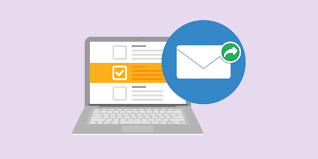

> You manage a national retail business, and you email a survey to all your customers. When you analyze the results, you notice that most of the respondents live in California. In reality, most of your stores are in the Midwest. For whatever reason, your survey has significant sampling bias in favor of California. Customers in California may be different from your customers in the midwest in important ways (e.g. demographics, income, retail alternatives, product preferences, etc.). This is a problem. If you applied the results of your survey to your Midwest locations, then you would have a skewed view which could lead to bad (and expensive) business decisions (like stocking the wrong product mix or launching the wrong marketing campaign or buying the wrong real estate).




How do you know whether sampling bias is a problem in your study? In general, if an independent variable (e.g. a consumer's home state) shows a significant correlation with your outcome variable (e.g. product preferences), then the distribution of this variable in your sample should be similar to the distribution of this variable in the whole population. If it isn’t, then you have a problematic sampling bias.


A [simple random sample](https://en.wikipedia.org/wiki/Simple_random_sample) generally solves sampling bias (and is why random assignment to groups is a critical feature of AB tests). But often in the real world (like the email survey example above) random sampling during data collection isn't possible. You have to work with the data you get, and sometimes that data has sampling bias. 


# How to Quantify Samping Bias in SafeGraph Patterns

We want to measure the (sampling) bias in the SafeGraph Patterns dataset so that we can answer questions like "How many people visited this store?" and "Who are the customers of my competitor?" without getting a biased or incomplete picture. 






## What is SafeGraph Patterns?
SafeGraph Patterns is a dataset about commercial brick-and-mortar points-of-interest (POI) and  includes anonymized counts of how many people visit these POI each month. The counts of visitors are derived from a panel of anonymized mobile device data (see **What is the Panel Sample?** below). These counts are broken down by different dimensions, including by the **home census block group of the visitor**. For example, the dataset may report that 85 total devices visited a specific POI. It also reports that 50 of those visitors live in census block group X, 25 live in census block Y, and 10 live in census block group Z. 



The aggregated form of SafeGraph Patterns helps to ensure the protection of individuals' privacy, while also providing actionable data for statistical analysis and data science. For all the details on SafeGraph Patterns, see the [SafeGraph Patterns docs](https://docs.safegraph.com/docs/places-schema#section-patterns/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). 



### What is the Panel Sample?

But what is the sample from which SafeGraph Patterns is aggregated? SafeGraph Patterns is aggregated from a [panel](https://en.wikipedia.org/wiki/Panel_data) (sample of population that is measured longitudinally) of ~40MM mobile devices (e.g., smart phones) in the USA. 

Protecting individual consumer privacy is at the core of the SafeGraph mission:  



> "SafeGraph’s mission is to make the world’s data open for innovation while protecting individuals privacy." - [SafeGraph Vision and Values](https://blog.safegraph.com/safegraph-vision-and-values-circa-2017-d188d4185df2/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)

The devices in the panel are fully anonymized; **no device-level demographic data exists for devices in the panel**. However, for every device in the panel, SafeGraph *estimates* the home census block group (CBG) of that device, based on the most common location during night time hours. Importantly, none of the anonymized device-specific data is available to us as customers of SafeGraph data; SafeGraph Patterns is an aggregated view. SafeGraph provides an aggregated summary of the panel, [Home Location Distributions by State/Census Block Group](https://docs.safegraph.com/docs/places-schema#section-home-location-distributions-by-state-census-block-group/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias), as part of the Panel Overview Data. 


## We can quantify Sampling Bias by comparing  the Panel Sample to the US Census Population

Since the US Census publishes population and demographic data for every census block group (CBG), we can  use the US Census data as a groundtruth against which to benchmark sampling bias in the panel. 



We will explore sampling bias on several dimensions: 

* Geographic
  * State 
  * County
  * Census Block Group
  
* Demographic (inferred from census block group)
  * Race
  * Educational Attainment
  * Household Income
 
<br/><br/>

To start, let's load up the datasets. 




## Notebook and Data Setup

**Quick Start -- How to use this notebook**
* This is an interactive [Google CoLab notebook](https://colab.research.google.com/notebooks/welcome.ipynb). 
* If you want, you can simply read through and see my code and my results below. Enjoy!
* Moreover, you are viewing an ephemeral copy of this notebook **that you can edit and re-run yourself**. You are highly encouraged to interact with the code and try things--only you can see your ephemeral copy (try double-clicking into this cell right now!)
  * If you want to save your changes, then you save a copy to your own Google Drive.
* As-is, this notebook reads data from a public Google Drive owned by SafeGraph.
  * For this to work, Google will prompt you to login, and confirm that you want to run a notebook written by SafeGraph (you should click "Run Anyway"), and authenticate your user. 
  * Be assured, this notebook does not read any data from your personal drive and your data is not shared with SafeGraph. That's just how Google CoLab reads from Google Drive. 

Pro-Tip for Power Users:
* Alternatively, you can upload your own copy of these datasets into *your* Google Drive and [mount your Google drive to this notebook (see "Bonus Method")](hhttps://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92). This is how I worked with the data during the development of the notebook. It slightly changes how you read the data, so I have left those commands inline below, but commented out with the tag `#ForMountedDrive` in case you prefer this option.
  * All of the datasets used in this notebook can be obtained for free from [SafeGraph.com](https://shop.safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) with the coupon code at the bottom of the notebook.



---

If you want to edit the code interactively, make sure you can run the cell directly below. Otherwise, just read on!

In [ ]:
your_name = "EDIT YOUR NAME" # << You can edit this

################################

# These libraries are required to read directly from SafeGraph's public GoogleDrive
# This is not necessary if you mount your own Drive directly. 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################

print("If your name is {0}, then you've successfuly run this cell. \nYou are authenticated and can edit and re-run anything in the notebook. Enjoy!".format(your_name))

If your name is EDIT YOUR NAME, then you've successfuly run this cell. 
You are authenticated and can edit and re-run anything in the notebook. Enjoy!


In [ ]:
# #ForMountedDrive -- mount your google drive with the below command
# from google.colab import drive
# drive.mount('/content/drive')

**Load libraries:**

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


#~~~~~~ Display Settings

plt.rcParams['figure.figsize'] = [8, 8]
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

#~~~~~~

import platform
print("This notebook is running python version: {0}".format(platform.python_version()))
print("This notebook is running pandas version: {0}".format(pd.__version__))

# This is what the original author is running:
# This notebook is running python version: 3.6.8
# This notebook is running pandas version: 0.24.2


This notebook is running python version: 3.6.9
This notebook is running pandas version: 0.25.3


In [ ]:
################################

# These functions are required to read directly from SafeGraph's Public Drive
# These are not necessary if you've directly mounted your own google drive

def pd_read_csv_drive(id, drive=drive, dtype=None):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('Filename.csv')  
  return(pd.read_csv('Filename.csv',dtype=dtype))


# Note: OpenCensusData public GDrive folder: https://drive.google.com/open?id=1btSS6zo7_wJCCXAigkbhnaoeU-Voa9pG

drive_ids = {'cbg_b19.csv' : '1d9GscpWbrnP2xNLKKlgd6xLcFTzJydY4',
              'cbg_b01.csv' : '1QqttoDRoKpZM2TyyRwJ8B9c5bYZrHysB',
              'cbg_b02.csv' : '1Zqqf3iLDkDWPl2theLlUm_cAbvznj-Kx',
              'cbg_b15.csv' : '1xeSZShcX3egZFsalGOFD6Ze2jTof6ri-',
              'cbg_field_descriptions.csv' : '1a7_7WxY6eaUIObkVwfknl9C7nPltYxPd',
              'cbg_fips_codes.csv' : '1dB_HeAw11TmsZ8MATMedC9j2csTRAiVm',
             'home_panel_summary.csv': '1aiwhO6Pw1ZfUOoqUf6mS70s9tJgsAVp5'
}

################################

### Load Open Census Data

Census data can be be difficult to navigate, so SafeGraph [packaged all of it in a convenient single download called Open Census Data](https://blog.safegraph.com/download-open-census-data-visualize-neighborhood-insights-9348145bb5f1/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). 

This notebook is pulling Open Census Data from a public Google Drive created by SafeGraph (See Notebook and Data Setup, above).  

If you want your own copy of Open Census Data, you can [download Open Census Data here](https://www.safegraph.com/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias). See the [SafeGraph Open Census Data docs](https://docs.safegraph.com/docs/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) for documentation on what is included and how the files are organized.



In [ ]:
# #ForMountedDrive --  After Mounting Drive we can access files in your google drive
# sg_ocd_dir = "/content/drive/My Drive/publicly_shared/openCensusData/" # copy/paste path for SafeGraph Open Census Data
# print("expected output is ['metadata', 'geometry', 'data']")
# print(os.listdir(sg_ocd_dir))

The total population of each `census_block_group` is stored in the file `cbg_b01.csv`

In [ ]:
# cbg_b01 = pd.read_csv(sg_ocd_dir + "data/cbg_b01.csv",dtype = {'census_block_group': str}) #ForMountedDrive
cbg_b01 = pd_read_csv_drive(drive_ids['cbg_b01.csv'],dtype = {'census_block_group': str})
columns = ['census_block_group', 'B01001e1']
cbg_b01 = cbg_b01[columns]
cbg_b01.head()

,census_block_group,B01001e1
0,010010201001,745
1,010010201002,1265
2,010010202001,960
3,010010202002,1236
4,010010203001,2364


In [ ]:
# cbg_field_desc = pd.read_csv(sg_ocd_dir + "metadata/cbg_field_descriptions.csv") #ForMountedDrive
cbg_field_desc = pd_read_csv_drive(drive_ids['cbg_field_descriptions.csv'])
print('B01001e1')
print(cbg_field_desc[cbg_field_desc.table_id == 'B01001e1'].field_full_name)
 

B01001e1
4    SEX BY AGE: Total: Total population -- (Estimate)
Name: field_full_name, dtype: object


So, `B01001e1` is the `table_id` code for the  `Total Population`. This dataset tells us the Total Population for each census block group. 

For the sake of clarity, we rename this column.


In [ ]:
cbg_b01.rename({'B01001e1':'census_population'}, axis='columns', inplace=True)

total_usa_pop = cbg_b01['census_population'].sum()
print("Total USA population according to US Census: {0}".format(total_usa_pop))

Total USA population according to US Census: 322087547


### Load SafeGraph Panel Summary


In [ ]:
# #ForMountedDrive - Upload your patterns data to Google drive and copy the path
# patterns_path = "/content/drive/My Drive/publicly_shared/Major-Brands-2019-Oct-CORE-PATTERNS"
# # Confirm correct structure
# print("expected files: ['home_panel_summary.csv','core_poi-patterns.csv','brand_info.csv','visit_panel_summary.csv']")
# os.listdir(patterns_path)

For reference, see [schema of home_panel_summary.csv ](https://docs.safegraph.com/docs/places-schema#section-home-location-distributions-by-state-census-block-group/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias)

This dataset tells us how many devices are residing in each CBG in the SafeGraph dataset.

In [ ]:
# home_panel = pd.read_csv(patterns_path + '/home_panel_summary.csv', dtype = {'census_block_group': str}) #ForMountedDrive
home_panel = pd_read_csv_drive(drive_ids['home_panel_summary.csv'], dtype = {'census_block_group': str})
home_panel.head()

,year,month,state,census_block_group,number_devices_residing
0,2019,9,ak,021580001001,31
1,2019,9,ak,020200023033,114
2,2019,9,ak,021050003001,105
3,2019,9,ak,021700006042,67
4,2019,9,ak,021880001003,8


### Join Census and Home Panel data to compare relative population distribution

In [ ]:
join_df = pd.merge(cbg_b01[['census_block_group', 'census_population']], home_panel[['census_block_group', 'number_devices_residing']], how = 'left', on = ['census_block_group'], suffixes=('_cen', '_sg'))
join_df['state_fips'] = [fips[0:2] for fips in join_df.census_block_group]
join_df['county_fips'] = [fips[2:5] for fips in join_df.census_block_group]

# Also load in FIPS codes for county names
# fips_codes = pd.read_csv(sg_ocd_dir + "metadata/cbg_fips_codes.csv", dtype = {'state_fips': str, 'county_fips':str}) #ForMountedDrive
fips_codes = pd_read_csv_drive(drive_ids['cbg_fips_codes.csv'], dtype = {'state_fips': str, 'county_fips':str})
county_codes = fips_codes[['state_fips','county_fips', 'state', 'county']].drop_duplicates()
join_df = pd.merge(join_df,county_codes)
join_df.head()

,census_block_group,census_population,number_devices_residing,state_fips,county_fips,state,county
0,010010201001,745,325.0,01,001,AL,Autauga County
1,010010201002,1265,152.0,01,001,AL,Autauga County
2,010010202001,960,74.0,01,001,AL,Autauga County
3,010010202002,1236,115.0,01,001,AL,Autauga County
4,010010203001,2364,244.0,01,001,AL,Autauga County


Check if we are missing any CBGs in the Home Panel dataset, and set the value to 0. 

In [ ]:
missing_cbgs = join_df[join_df.number_devices_residing.isnull()].sort_values('census_population', ascending = False)
print("We are missing SG data for {0} CBGs containing {1} residents".format(missing_cbgs.shape[0],missing_cbgs.census_population.sum()))
join_df = join_df.fillna(0)
print("Set number_devices_residing to 0 for missing CBGs") # For these, we will set the value to 0, since the panel has 0 devices in these CBGs. 
join_df[(join_df.number_devices_residing == 0) & (join_df.census_population > 0)].head()

We are missing SG data for 318 CBGs containing 27344 residents
Set number_devices_residing to 0 for missing CBGs


,census_block_group,census_population,number_devices_residing,state_fips,county_fips,state,county
8148,040279800051,535,0.0,04,027,AZ,Yuma County
31683,060952528011,71,0.0,06,095,CA,Solano County
40070,100030169041,2763,0.0,10,003,DE,New Castle County
47914,120879801001,4,0.0,12,087,FL,Monroe County
50797,121059800001,32,0.0,12,105,FL,Polk County


In [ ]:
total_population = join_df[['census_population','number_devices_residing']].sum(axis = 0)
total_population

census_population          322315494.0
number_devices_residing     46412523.0
dtype: float64

## A formula to quantify sampling bias

As shown above, overall there are 46,412,523 devices in this version of the SafeGraph home panel and 322,315,494 people in the US Census population.\**

If the SafeGraph home panel had no sampling bias, then we'd expect the proportion of any given sub-group in the panel sample to approximate the proportion of that sub-group in the whole population. 

As an example, let's consider the state of Pennsylvannia (PA). As we will see below, the panel has 1,807,221 `number_devices_residing` in the state of Pennsylvania. The census_population sum for PA is 12,790,174.
<br/><br/>

$ observed\_proportion = 1807221 \: / \:46412523 \approx  3.89\% $
<br/><br/>
$ expected\_proportion = 12790174 \: / \:322315494 \approx  3.97\% $
<br/><br/>



These proportions are pretty close, but let's define bias precisely:
<br/><br/>

$ Bias = observed\_proportion \: - \: expected\_proportion$
<br/><br/>

Since $(3.89\%-3.97\%) = -0.08\%$, we say that the SafeGraph dataset is **under**-indexed (negatively biased) on PA by about 0.08%. In other words, given the overall sample size, the panel represents PA 0.08% less than expected from a perfect large-N random sample .

<br/><br/>
Another way to characterize the *overall* bias of the sample is by looking at the Pearson correlation coefficient ($r$) between  `number_devices_residing` and `census_population` across all groups. High $r$ means there is a strong linear relationship between the sample and the population and overall low sampling bias. 
<br/><br/>

If the panel was a true large-N random sample of the `census_population` then we'd expect a near perfect correlation coefficient ($r =1$) with a regression coefficient (slope) of $ sample\_total \:/ \: USA\_population\_total \approx 0.144 $.

<br/><br/>
We now use this framework to examine bias in the panel on different geographic and demographic dimensions. 

<br/><br/>
\*\* *Note: In actuality, we know that the panel sample includes 0 persons under the age of 13 years old, so it is not representing the full US population, but for now we will ignore this.*



Briefly, we define some functions given the above framework to aid in exploratory data analysis and visualization.

In [ ]:
# functions for exploratory data analysis and visualization of Sampling Bias


def compute_bias(df, sample_var_col='number_devices_residing', pop_var_col='census_population'):
  # compute bias for a dataframe of observed and expected values
  # returns a pd.Series
  observed_proportion = df[sample_var_col] / df[sample_var_col].sum()*100
  expected_proportion = df[pop_var_col] / df[pop_var_col].sum()*100
  bias = observed_proportion - expected_proportion
  return(bias)
  

def make_center_line_coords(df,x,y):
  # This creates two coords to define the hypothetical line in which x and y are perfectly correlatd
  expected_slope = df[y].sum()/df[x].sum()
  xcoord = np.array([df[x].min(), df[x].max()])
  ycoord = expected_slope*xcoord
  return((xcoord,ycoord))
  
def summarize_bias(df,bias_col):
  sum_abs_bias = np.absolute(df[bias_col]).sum()
  print("Sum Absolute Bias: {0:.2f}".format(sum_abs_bias))
  return(None)

def plot_sg_vs_census(df, xvar, yvar,bias_col='bias',xlim_=None,ylim_=None,text_col=None, num_to_label=5,alpha=0.9,labelfontsize=14):
  # `text_col` is the column used to annotate the points
  # `num_to_label` sets the top num_to_label records sorted by yvar to be annotated
  
  plt.rcParams['figure.figsize'] = [7, 7]
  
  # Report Stats
  pearson_r = df.corr().loc[xvar, yvar]
  print("pearson r: {0:.3f}".format(pearson_r))
  summarize_bias(df,bias_col)
  
  # scatter plot
  ax = df.plot.scatter(xvar, yvar, alpha = alpha, edgecolor = 'k', xlim = xlim_, ylim = ylim_)
  # annotate 
  xadj = df[xvar].max()*0.02
  if(text_col is not None):
    for i, point in df.sort_values(by=xvar,ascending=False).iloc[0:num_to_label].iterrows():
      ax.text(point[xvar] + xadj, point[yvar], str(point[text_col]),fontsize=labelfontsize, verticalalignment='center')
  # plot expectation line
  line_coords = make_center_line_coords(df,xvar,yvar)
  plt.plot(line_coords[0],line_coords[1], color = 'k',linestyle='-', linewidth=1)
  return(ax)


# Sampling Bias in Geography

Since we have geographically labeled data in the panel sample and in the census data, geography is a good place to start. 

## Sampling Bias at the State Level

In [ ]:
join_df_gb_state = join_df.groupby(['state']).sum().reset_index()
join_df_gb_state['bias'] = compute_bias(join_df_gb_state, sample_var_col='number_devices_residing' , pop_var_col='census_population')
print(join_df_gb_state.shape)



(52, 4)


Figure 1: State-Level Sampling Bias
pearson r: 0.977
Sum Absolute Bias: 12.90


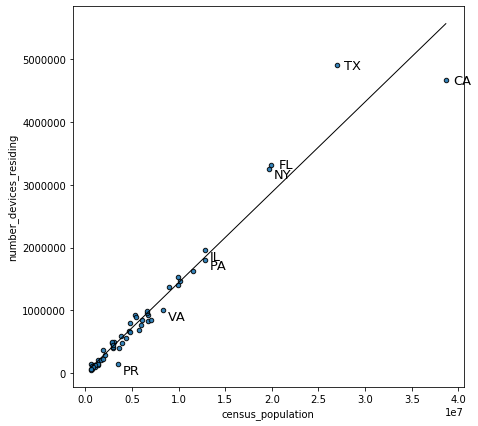

In [ ]:
print("Figure 1: State-Level Sampling Bias")


xvar = 'census_population'
yvar = 'number_devices_residing'
ax = plot_sg_vs_census(join_df_gb_state,xvar,yvar,text_col='state',num_to_label=3,labelfontsize=13)

# Also plot PR and VA
for i, point in join_df_gb_state[join_df_gb_state.state.isin(['PR','VA', 'PA','IL','NY'])].iterrows():
      ax.text(point[xvar] + 9**6, point[yvar], str(point['state']),fontsize=13, verticalalignment='top')


Figure Explanation:
* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (in panel sample) on the y-axis.
* There is one point for each state (or US territory). The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 

Results & Interpretation:
* Below lists the 10 states with largest absolute bias. So, the panel is under-indexed in CA by about -1.9%, and it is over-indexed in TX and FL by 2.1 and 0.9%, respectively. 

* The correlation coefficient is 0.98, indicating that overall the panel is not very biased at the state level. 
* Of note, Puerto Rico (PR) and Virginia (VA) are particularly under-indexed given their overall size. 

In [ ]:
# print states with largest absolute bias
join_df_gb_state['abs_bias'] = np.absolute(join_df_gb_state.bias)
join_df_gb_state.sort_values(by = 'abs_bias', ascending = False).head(10)

,state,census_population,number_devices_residing,bias,abs_bias
44,TX,26966636,4901720.0,2.194667,2.194667
4,CA,38656477,4661516.0,-1.949706,1.949706
9,FL,19935213,3318791.0,0.965637,0.965637
34,NY,19701765,3256790.0,0.904479,0.904479
39,PR,3529385,139140.0,-0.795220,0.795220
46,VA,8334349,1009463.0,-0.410794,0.410794
48,WA,7074011,847222.0,-0.369331,0.369331
49,WI,5756077,678514.0,-0.323932,0.323932
5,CO,5359295,920513.0,0.320581,0.320581
19,MA,6747120,823817.0,-0.318339,0.318339


## Sampling Bias at the County Level

There are 3218 counties in the USA.
Intuitively, as you divide your population into smaller and smaller sub-groups, it becomes harder to proportionally sample each of these sub-groups from the population given a constant sample size. 

Therefore, we expect sampling bias to be worse at the level of counties compared to the level of states. Nonetheless, counties are an important sub-division of the country, capturing significant variance in demographics, so we hope the sampling bias to be small. 


In [ ]:
join_df_gb_county = join_df.groupby(['state', 'county']).sum().reset_index()
join_df_gb_county['bias'] = compute_bias(join_df_gb_county, sample_var_col='number_devices_residing' , pop_var_col='census_population')
print(join_df_gb_county.shape)


(3218, 5)


Figure 2: County-Level Sampling Bias
pearson r: 0.966
Sum Absolute Bias: 24.77


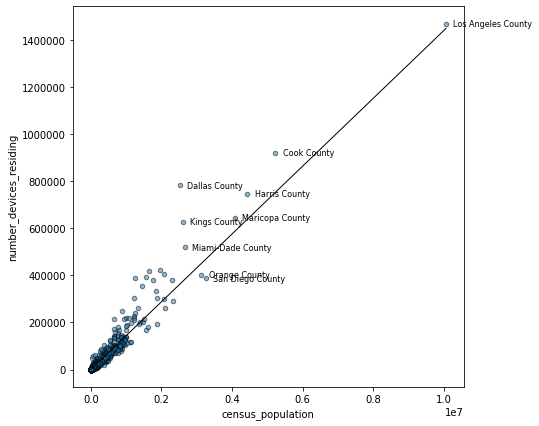

In [ ]:
print("Figure 2: County-Level Sampling Bias")
ax = plot_sg_vs_census(join_df_gb_county,'census_population','number_devices_residing', alpha = 0.5, text_col='county', num_to_label=9,labelfontsize=8)

Figure Explanation:
* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (in panel sample) on the y-axis.
* There is one point for each County in the USA. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 

Results & Interpretation:
* Below lists the 10 counties with the largest bias. 
* Overall the correlation across all counties is 0.97. This is down from the state level, but still very high, indicating that overall the panel is not highly biased across counties.

In [ ]:
# print counties with largest absolute bias
join_df_gb_county['abs_bias'] = np.absolute(join_df_gb_county.bias)
join_df_gb_county.sort_values(by = 'abs_bias', ascending = False).head(10)

,state,county,census_population,number_devices_residing,bias,abs_bias
2655,TX,Dallas County,2513054,782372.0,0.906004,0.906004
2003,NY,Kings County,2606852,627527.0,0.543275,0.543275
366,FL,Orange County,1256055,388190.0,0.446693,0.446693
2010,NY,New York County,1634989,419742.0,0.397109,0.397109
2293,PA,Philadelphia County,1559938,393423.0,0.363687,0.363687
708,IL,Cook County,5227575,919275.0,0.358780,0.358780
1982,NY,Bronx County,1436785,352829.0,0.314432,0.314432
2818,TX,Tarrant County,1947529,424815.0,0.311072,0.311072
361,FL,Miami-Dade County,2664418,519316.0,0.292264,0.292264
1339,MN,Hennepin County,1209265,303676.0,0.279117,0.279117


## Sampling Bias at the Census Block Group Level

There are over 220,000 census block groups in the USA. 

Since SafeGraph Patterns data and Census data both are provided at the granularity of census block groups, it would be helpful if SafeGraph data was well sampled across all 220,000 census block groups. 

In [ ]:
join_df_cbg = join_df.copy()
join_df_cbg['bias'] = compute_bias(join_df_cbg, sample_var_col='number_devices_residing' , pop_var_col='census_population')
print(join_df_cbg.shape)


(220490, 8)


Figure 3: Census Block Group-Level Sampling Bias
pearson r: 0.176
Sum Absolute Bias: 61.63


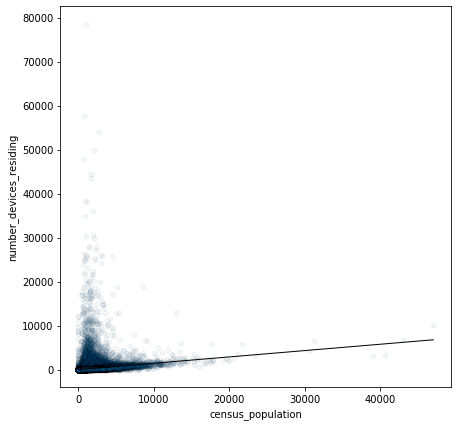

In [ ]:
print("Figure 3: Census Block Group-Level Sampling Bias")
alpha_level = 0.05 # transparency of points (0,1)
ax = plot_sg_vs_census(join_df_cbg,'census_population','number_devices_residing', alpha = alpha_level,num_to_label=0)

Figure Explanation:
* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (in panel sample) on the y-axis.

* There is one point for each Census Block Group in the USA. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 




(See also **CBG Sampling Bias Results** below)


In [ ]:
# print cbgs with largest absolute bias
join_df_cbg['abs_bias'] = np.absolute(join_df_cbg.bias)
join_df_cbg.sort_values(by = 'abs_bias', ascending = False).head(5)

,census_block_group,census_population,number_devices_residing,state_fips,county_fips,state,county,bias,abs_bias
185808,480850307023,965,78615.0,48,085,TX,Collin County,0.169084,0.169084
54736,131210035001,726,57721.0,13,121,GA,Fulton County,0.124140,0.124140
135593,360610031001,2744,54014.0,36,061,NY,New York County,0.115527,0.115527
197150,484391220012,2048,49953.0,48,439,TX,Tarrant County,0.106993,0.106993
78076,201550018002,717,47972.0,20,155,KS,Reno County,0.103138,0.103138


It's hard to visualize 220,000 points on one chart, so to get a sense of how many points are in the upper-left limb, let's apply a bias threshold. 

Figure 4: CBG Data excluding the most biased points

Using bias threshold of: 0.001
Number of CBGs excluded with bias > threshold: 5635
Sum of `number_devices_residing` for excluded CBGs: 12912104.0

Plotting with transparency_level: 0.002/1

pearson r: 0.739
Sum Absolute Bias: 37.01


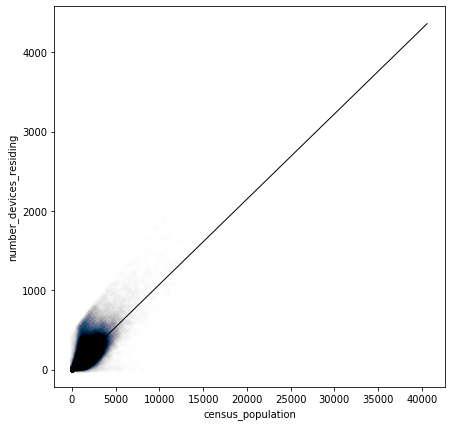

In [ ]:
print("Figure 4: CBG Data excluding the most biased points")
print("")
transparency_level = 0.002
bias_threshold = 0.001
print("Using bias threshold of: {0}".format(bias_threshold))
print("Number of CBGs excluded with bias > threshold: {0}".format(join_df_cbg[join_df_cbg.bias > bias_threshold].shape[0]))
print("Sum of `number_devices_residing` for excluded CBGs: {0}".format(join_df_cbg[join_df_cbg.bias > bias_threshold].number_devices_residing.sum()))
print("\nPlotting with transparency_level: {0}/1".format(transparency_level))
print("")
ax = plot_sg_vs_census(join_df_cbg[join_df_cbg.bias < bias_threshold],'census_population','number_devices_residing', alpha = transparency_level ,num_to_label=0)


### CBG Sampling Bias Results


* Figure 3 shows that the full CBG dataset has a correlation coefficient of r = 0.18. This scatter plot looks much worse than the state- and county-level plots. This is not what we expected to see.

* In Figure 3, there is a large group of points  stretching into the upper-left quadrant of the chart. Upper-left points are CBGs in which the census reports a very low population but SafeGraph reports a very large `number_devices_residing`.  So this group of points are all CBGs in which the panel is highly over-indexed.

* For example, CBG `480850307023` in Collin County TX only has 965 residents according to the census, but has 78,615 `number_devices_residing` in the SafeGraph data (!)

* Inspecting the chart, (and exploring a subset of the less biased data in Figure 4) we see 2 main dimensions in the data: 
  * 1st is the main group correlated along the expectation line.
  * 2nd is the outlier group stretching into the upper-left quadrant. 

* Adjusting the alpha_value (transparency of the points) shows that most of the mass of points are small CBGs clustered near the bottom left of the chart. 

* Although the outlier group represent < 10% of all CBGs, this is still a concerning result. 
<br/><br/>

* We will discuss these results further in the **Conclusions** section, but first let's examine sampling bias in demographic groups.

 


# Sampling Bias in Demographics

* Although the panel data does not contain any  demographic data, we can infer average demographics from the census block groups.

* Similarly, we can examine the sampling bias along these geographic dimensions (even though they are just linear combinations of the sampling bias at the level of census block groups, as explored above).

* Nonetheless, these demographic "sub-spaces" are lower dimension than the geography "sub-spaces" and therefore may be simpler quantitative views of sampling bias. 

* Despite having significant outliers in the sampling of individual census block groups (as viewed through the geographic lens above), when these CBGs are aggregated into demographic dimensions the outliers are smoothed over due to summing many CBGs. As shown below, the panel looks very well sampled across major demographic categories. 



In [ ]:
def sum_and_wrangle_demo_counts(df, demo_code_list):
  # this function tidy's the demo data into expected form for visualization functions
  
  # sum each demo category across all CBGs 
  columns_to_sum = demo_code_list + [dc + '_panel' for dc in demo_code_list]
  summs = pd.DataFrame(df[columns_to_sum].sum()).reset_index()
  summs.columns = ['demo_code','count']
  
  # data wrangle to get into correct format for visualization
  summs['panel'] = summs.demo_code.str.contains('panel')
  summs['table_id'] = summs.demo_code.str.split("_").str[0]
  summs = pd.merge(summs[summs.panel], summs[~summs.panel], on='table_id', suffixes=('_panel', '_census'))
  summs = summs[['table_id', 'count_census','count_panel']]
  return(summs)

## Sampling Bias: Race

For example, let's measure the sampling bias of the panel sample in terms of Race. 
Again, we do not have any direct information about the Race of devices in the panel sample, but we can infer the average race based on the census block group. 

The Census divides everyone into the following top-level race categories: 
* White Alone
* Black Or African American Alone
* American Indian And Alaskan Native Alone
* Asian Alone
* Native Hawaiin and Other Pacific Islander Alone
* Some Other Race Alone
* Two Or More Races

The table_id codes for these categorie are `['B02001e2','B02001e3','B02001e4','B02001e5','B02001e6','B02001e7','B02001e8']`




In [ ]:
# race_census_data = pd.read_csv(sg_ocd_dir + "data/cbg_b02.csv",dtype = {'census_block_group': str})
race_census_data = pd_read_csv_drive(drive_ids['cbg_b02.csv'],dtype = {'census_block_group': str})
race_table_ids = ['B02001e2','B02001e3','B02001e4','B02001e5','B02001e6','B02001e7','B02001e8']
columns = ['census_block_group'] + race_table_ids
race_census_data = race_census_data[columns]


In [ ]:
join_df_race = pd.merge(join_df,race_census_data)

# allocate panel count into demo categories with proportions dictated by census
for census_id in race_table_ids: 
  # demo-group panel_count = (devices in this CBG)* (fraction of demo-group in CBG)
  join_df_race[census_id + '_panel'] = join_df_race['number_devices_residing'] * join_df_race[census_id]/join_df_race['census_population']

# sum across all CBGs
summs_race = sum_and_wrangle_demo_counts(join_df_race, race_table_ids)

# bring in census labels
summs_race = pd.merge(summs_race, cbg_field_desc[['table_id', 'field_level_2']])
summs_race['bias'] = compute_bias(summs_race, sample_var_col='count_panel' , pop_var_col='count_census')
summs_race.head(10)

,table_id,count_census,count_panel,field_level_2,bias
0,B02001e2,236316154.0,3.313096e+07,White Alone,-1.703598
1,B02001e3,40579780.0,6.508515e+06,Black Or African American Alone,1.478487
2,B02001e4,2594562.0,3.124403e+05,American Indian And Alaska Native Alone,-0.129616
3,B02001e5,16628807.0,2.498749e+06,Asian Alone,0.242034
4,B02001e6,560419.0,7.264542e+04,Native Hawaiian And Other Pacific Islander Alone,-0.016845
5,B02001e7,15612844.0,2.294272e+06,Some Other Race Alone,0.115250
6,B02001e8,10022928.0,1.445228e+06,Two Or More Races,0.014288


Figure 5: Race-Level Sampling Bias
pearson r: 1.000
Sum Absolute Bias: 3.70


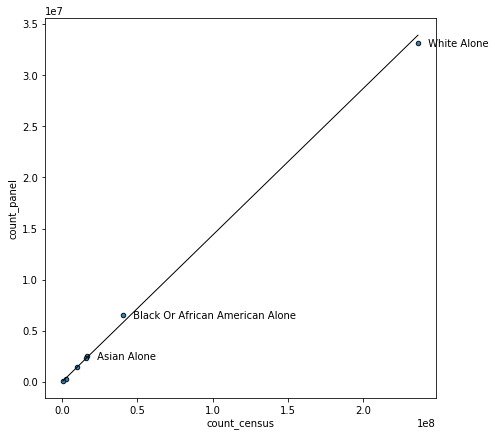

In [ ]:
print("Figure 5: Race-Level Sampling Bias")
ax = plot_sg_vs_census(summs_race,'count_census','count_panel', text_col = 'field_level_2', labelfontsize=10, num_to_label=3)

Figure Description: 

* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (panel) on the y-axis.

* There is one point for each Top Level Census Race Category. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 

Results:
* Overall, the panel is well-sampled across demographic categories. 
* Slightly under-indexed on `White Alone` and slightly over-indexed on `Black Or African American Alone`

## Sampling Bias: Educational Attainment For The Population 25 Years And Over

As another example, let's look at the Education Attainment for the Population 25 years and over. 


The Census divides everyone into the following top-level Educational Attainment categories: 

1. No Schooling Completed
2. Nursery School
3. Kindergarten
4. 1St Grade
5. 2Nd Grade
6. 3Rd Grade
7. 4Th Grade
8. 5Th Grade
9. 6Th Grade
10. 7Th Grade
11. 8Th Grade
12. 9Th Grade
13. 10Th Grade
14. 11Th Grade
15. 12Th Grade, No Diploma
16. Regular High School Diploma
17. Ged Or Alternative Credential
18. Some College, Less Than 1 Year
19. Some College, 1 Or More Years, No Degree
20. Associate'S Degree
21. Bachelor'S Degree
22. Master'S Degree
23. Professional School Degree
24. Doctorate Degree


The table_id codes for these categorie are `['B15003e10','B15003e11','B15003e12','B15003e13','B15003e14','B15003e15','B15003e16','B15003e17','B15003e18','B15003e19','B15003e2','B15003e20','B15003e21','B15003e22','B15003e23','B15003e24','B15003e25','B15003e3','B15003e4','B15003e5','B15003e6','B15003e7','B15003e8','B15003e9']`



In [ ]:
# edu_census_data = pd.read_csv(sg_ocd_dir + "data/cbg_b15.csv",dtype = {'census_block_group': str})
edu_census_data = pd_read_csv_drive(drive_ids['cbg_b15.csv'],dtype = {'census_block_group': str})
edu_table_ids = ['B15003e10','B15003e11','B15003e12','B15003e13','B15003e14','B15003e15','B15003e16','B15003e17','B15003e18','B15003e19','B15003e2','B15003e20','B15003e21','B15003e22','B15003e23','B15003e24','B15003e25','B15003e3','B15003e4','B15003e5','B15003e6','B15003e7','B15003e8','B15003e9']
columns = ['census_block_group'] + edu_table_ids
edu_census_data = edu_census_data[columns]


In [ ]:
join_df_edu = pd.merge(join_df,edu_census_data)

# allocate panel count into demo categories with proportions dictated by the census
for census_id in edu_table_ids: 
  # demo-group panel_count = (devices in this CBG)* (fraction of demo-group in CBG) census block group
  join_df_edu[census_id + '_panel'] = join_df_race['number_devices_residing'] * join_df_edu[census_id]/join_df_edu['census_population']


# sum across all CBGs
summs_edu = sum_and_wrangle_demo_counts(join_df_edu, edu_table_ids)

# bring in census labels
summs_edu = pd.merge(summs_edu, cbg_field_desc[['table_id', 'field_level_2']])
summs_edu['bias'] = compute_bias(summs_edu, sample_var_col='count_panel' , pop_var_col='count_census')
summs_edu['abs_bias'] =  np.absolute(summs_edu.bias)
summs_edu.sort_values(by='abs_bias', ascending = False).head(10)

,table_id,count_census,count_panel,field_level_2,bias,abs_bias
7,B15003e17,50927240.0,6.982484e+06,Regular High School Diploma,-1.016328,1.016328
13,B15003e22,40641500.0,6.120809e+06,Bachelor'S Degree,0.959583,0.959583
14,B15003e23,17576123.0,2.642019e+06,Master'S Degree,0.398751,0.398751
12,B15003e21,17712352.0,2.473185e+06,Associate'S Degree,-0.209206,0.209206
15,B15003e24,4297487.0,6.777504e+05,Professional School Degree,0.200003,0.200003
9,B15003e19,13399458.0,1.885504e+06,"Some College, Less Than 1 Year",-0.111365,0.111365
2,B15003e12,2936243.0,3.894508e+05,8Th Grade,-0.100973,0.100973
8,B15003e18,8602005.0,1.202105e+06,Ged Or Alternative Credential,-0.098366,0.098366
16,B15003e25,2887842.0,4.441886e+05,Doctorate Degree,0.098091,0.098091
4,B15003e14,4087743.0,5.676218e+05,10Th Grade,-0.058455,0.058455


Figure 6: Educationl Attainment-Level Sampling Bias
pearson r: 0.999
Sum Absolute Bias: 3.43


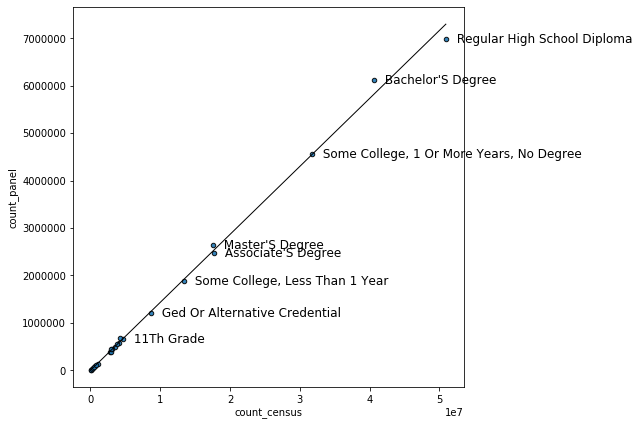

In [ ]:
print("Figure 6: Educationl Attainment-Level Sampling Bias")
ax = plot_sg_vs_census(summs_edu,'count_census','count_panel', text_col='field_level_2',labelfontsize=12,num_to_label=8)

Figure Description: 

* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (panel) on the y-axis.

* There is one point for each Top Level Category in Educational Attainment for The Population 25 Years And Older. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 

Results:
* Overall, the panel is well-sampled across educational attainment categories. 
* Inspecting the chart and the list above shows that the panel is slightly over-indexed on higher education levels like Bachelor's Degree and Masters Degree and under-indexed on High School Diploma. 

## Sampling Bias: Household Income

For the final example, we examine Household Income In The Past 12 Months (in 2016 inflation-adjusted dollars).


The Census divides everyone into the following household income levels: 

1. Less Than \$10,000
2. \$10,000 To \$14,999
3. \$15,000 To \$19,999
4. \$20,000 To \$24,999
5. \$25,000 To \$29,999
6. \$30,000 To \$34,999
7. \$35,000 To \$39,999
8. \$40,000 To \$44,999
9. \$45,000 To \$49,999
10. \$50,000 To \$59,999
11. \$60,000 To \$74,999
12. \$75,000 To \$99,999
13. \$100,000 To \$124,999
14. \$125,000 To \$149,999
15. \$150,000 To \$199,999
16. \$200,000 Or More


The table_id codes for these categorie are `['B19001e10', 'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14', 'B19001e15', 'B19001e16', 'B19001e17', 'B19001e2', 'B19001e3', 'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9']`




In [ ]:
# inc_census_data = pd.read_csv(sg_ocd_dir + "data/cbg_b19.csv",dtype = {'census_block_group': str})
inc_census_data = pd_read_csv_drive(drive_ids["cbg_b19.csv"],dtype = {'census_block_group': str})
inc_table_ids = ['B19001e10', 'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14', 'B19001e15', 'B19001e16', 'B19001e17', 'B19001e2', 'B19001e3', 'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9']
columns = ['census_block_group'] + inc_table_ids
inc_census_data = inc_census_data[columns]


In [ ]:
join_df_inc = pd.merge(join_df,inc_census_data)
join_df_inc['census_population'] = join_df_inc[inc_table_ids].sum(axis=1) # total number of households <> total population, so we will re-define census_population to be total households

# allocate panel count into demo categories with proportions dictated by the census
for census_id in inc_table_ids: 
  # demo-group panel_count = (devices in this CBG)* (fraction of demo-group in CBG) census block group
  join_df_inc[census_id + '_panel'] = join_df_inc['number_devices_residing'] * join_df_inc[census_id]/join_df_inc['census_population']

# sum across all CBGs
summs_edu = sum_and_wrangle_demo_counts(join_df_inc, inc_table_ids)

# bring in census labels
summs_inc = pd.merge(summs_edu, cbg_field_desc[['table_id', 'field_level_2']])

summs_inc['bias'] = compute_bias(summs_inc, sample_var_col='count_panel' , pop_var_col='count_census')
summs_inc['abs_bias'] =  np.absolute(summs_inc.bias)
summs_inc.sort_values(by='abs_bias', ascending = False).head(10)

,table_id,count_census,count_panel,field_level_2,bias,abs_bias
8,B19001e2,8605569.0,3.589826e+06,"Less Than $10,000",0.554667,0.554667
3,B19001e13,14418888.0,5.491797e+06,"$75,000 To $99,999",-0.204745,0.204745
2,B19001e12,11781742.0,4.483621e+06,"$60,000 To $74,999",-0.175435,0.175435
1,B19001e11,9267047.0,3.521926e+06,"$50,000 To $59,999",-0.148204,0.148204
7,B19001e17,6684535.0,2.650053e+06,"$200,000 Or More",0.130745,0.130745
9,B19001e3,6150927.0,2.441766e+06,"$10,000 To $14,999",0.127376,0.127376
4,B19001e14,9886097.0,3.786931e+06,"$100,000 To $124,999",-0.093632,0.093632
0,B19001e10,4818829.0,1.828747e+06,"$45,000 To $49,999",-0.082793,0.082793
13,B19001e7,5931751.0,2.277210e+06,"$30,000 To $34,999",-0.045305,0.045305
12,B19001e6,5857695.0,2.251454e+06,"$25,000 To $29,999",-0.038941,0.038941


Figure 7: Household Income In The Past 12 Months - Sampling Bias

pearson r: 0.997
Sum Absolute Bias: 1.75


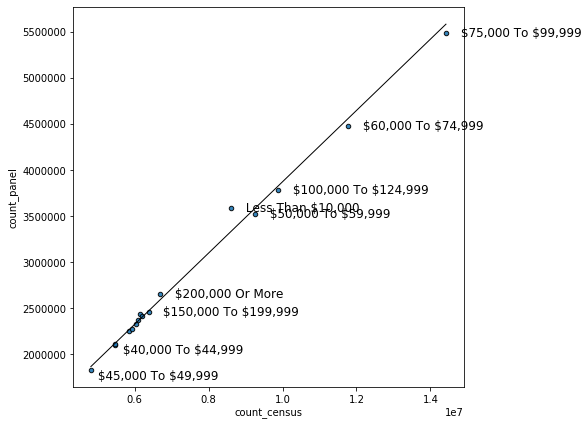

In [ ]:
print("Figure 7: Household Income In The Past 12 Months - Sampling Bias\n")

xvar = 'count_census'
yvar = 'count_panel'
label_col = 'labels'
labelfontsize = 12

summs_inc['labels'] = summs_inc.field_level_2.str.replace(pat='$',repl='\$', regex=False)
ax = plot_sg_vs_census(summs_inc,xvar,yvar, text_col=label_col,labelfontsize=labelfontsize,num_to_label=7)

# Plot a few more levels
for i, point in summs_inc[summs_inc.table_id.isin(['B19001e10','B19001e9'])].iterrows():
      ax.text(point[xvar]*1.02, point[yvar], str(point[label_col]),fontsize=labelfontsize, verticalalignment='top')


Figure Description: 

* Above is a scatter plot of `census_population` on the x-axis and  `number_devices_residing` (panel) on the y-axis.

* There is one point for each Census category of household income. The line shows the expected relationship for a true random sample. 
* Points above the line are over-indexed groups in the panel. Points below the line are under-indexed groups in the panel. 

Results:
* Overall, the panel is well-sampled across household income averages. 
* Perhaps unexpected, the panel is slightly overindexed on `Less than $10,000` (which includes both unemployed and retired households). 

# Conclusions 

* We quantified Sampling Bias in the SafeGraph panel across multiple geographic and demographic dimensions (demographic dimensions are inferred from the geographic dimenions, specifically the census block groups).
* Overall, on most dimensions examined, the panel is well sampled showing high correlations with the true population and low sum of absolute bias. 
* However, ~ 10% of census block groups (CBGs) show disproportionately and sometimes impossibly high `number_devices_residing` in the sample panel compared to the true `census_population`.
* These troublesome CBGs contain a relatively large % of the total panel devices (30-40% of total devices). 
* The fact that the data is well-sampled at the county-level but shows extreme sampling outliers at the CBG-level suggests the following interpretation: 
  * These outlier CBGs are likely not ***over-sampled***, but rather represent errors or technical limits in the ***attribution*** or linking of devices to home CBGs. For whatever reason, during the process SafeGraph uses to determine home CBG attribution, a minority of CBGs link to devices at a disproportionately high rate. 
  * Since the county-level data is well-correlated, this suggests that the misattribution is probably between geospatially proximate census block groups (i.e. neighbors) such that misattributing a device from one CBG to a neighbor CBG usually will not change the county-level attribution of that device. One metaphor is to think of these over-indexed CBGs as sinks or sponges, "stealing away" many devices from the devices' true (nearby) home CBG. Mobile device location data can exhibit "sink"-like behavior in some geographies for a variety of reasons (e.g., see section on **Sink Detection** in [this post](https://medium.com/@natasha_18377/less-than-10-of-bid-stream-location-data-is-high-quality-and-we-know-how-to-find-it-3a2c0df35475#---198-453).
* This interpretation is further supported by the fact that when individual CBGs are proportionally divided into demographic categories and aggregated within categories, sampling outliers seem to be smoothed over. Since neighboring CBGs, on average, have more similar demographic profiles than two geospatially distant CBGs, erroneously attributing a device to a near-neighbor CBG may not significantly distort the apparent overall demographic sampling when aggregated nationally.


# Key Takeaways

1.  The SafeGraph dataset shows compelling sampling rates across all US states and counties, as well as multiple demographic dimensions (demographics are inferred from the census block groups). The empirical sampling rates in the sample panel are quantitatively very close to the expected sampling rate from a large-N random sample.

2. At the level of census block groups, the sampling picture is more complicated. Given the large outliers in the `number_devices_residing` for select CBGs, one should consider methods for correcting and controlling these errors whenever using the specific CBG counts in the SafeGraph dataset. 

3. When doing large national analyses, the CBG sampling error issues seem to smooth over and are likely minimal. However, local analyses examining only a few CBGs are vulnerable to distortions due to the sampling errors in individual CBGs and therefore you should proceed with caution. 


# Preview: How to proceed with caution and correct sampling bias? 




When we analyzed sampling bias at the level of CBGs we saw a distorted picture with many highly over-indexed CBGs (See Figure 3). What if our analysis involved some of those very over-indexed CBGs (or under-indexed CBGs)? How can we use the data without getting a distorted picture?

There is a deep statistics literature with many strategies for how to account and correct for sampling bias.

But the short answer is we can use a method I call **Post-hoc Stratification Re-Weighting**

* **Post-hoc** because we are doing it *after* data collection.
* **[Stratification](https://en.wikipedia.org/wiki/Stratified_sampling)** sampling is a method of sampling from a population which can be partitioned into subpopulations (that's us!).
* **Re-weighting** is the method for *correcting* the sampling bias, given known strata (subpopulations).  
* If you know of a different standard name for this procedure, please let me know!
<br><br/>
---
<br><br/>
We will dive into post-hoc stratification re-weighting in a future post, but as a preview, this methodology allows us to take raw data like this: 

Figure 7: Uncorrected Census Block Group-Level Sampling Bias 
(same data as Figure 3)

pearson r: 0.176
Sum Absolute Bias: 61.63


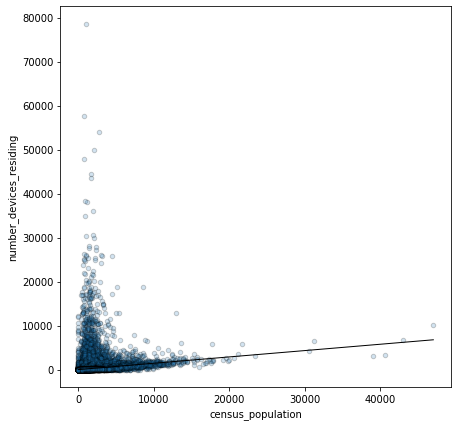

In [ ]:
print("Figure 7: Uncorrected Census Block Group-Level Sampling Bias \n(same data as Figure 3)\n")
ax = plot_sg_vs_census(join_df_cbg,'census_population','number_devices_residing', alpha = 0.2,num_to_label=0)

And turn it into this: 

Figure 8: Adjusted Census Block Group-Level Sampling

pearson r: 1.000
Sum Absolute Bias: 0.01


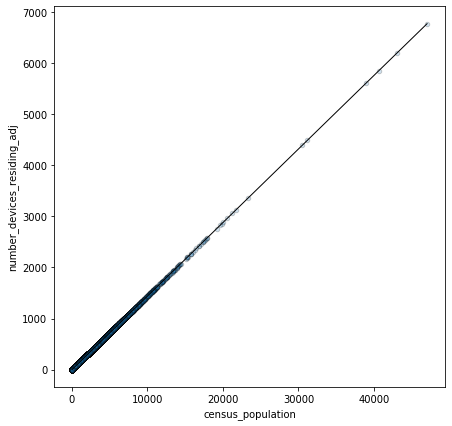

In [ ]:
print("Figure 8: Adjusted Census Block Group-Level Sampling\n")
join_df_cbg_adj = join_df_cbg.copy()
join_df_cbg_adj['cbg_adjust_factor'] = join_df_cbg_adj.census_population / join_df_cbg_adj.census_population.sum() * join_df_cbg_adj.number_devices_residing.sum() / join_df_cbg_adj.number_devices_residing
join_df_cbg_adj['number_devices_residing_adj'] = join_df_cbg_adj.number_devices_residing * join_df_cbg_adj.cbg_adjust_factor
join_df_cbg_adj['bias'] = compute_bias(join_df_cbg_adj, sample_var_col='number_devices_residing_adj' , pop_var_col='census_population')

ax = plot_sg_vs_census(join_df_cbg_adj,'census_population','number_devices_residing_adj', alpha = 0.2, num_to_label=0)


The data is now re-weighted so that it matches the population proportions exactly. 


---



In another post, we dive into the [logic and statistics behind Post-hoc Stratification Re-Weighting.](https://www.safegraph.com/blog/measuring-and-correcting-sampling-bias-for-accurate-demographic-analysis/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=panel_bias) 

We will show how to make statistical inferences about visit counts (i.e., extrapolation from the sample to the population) and how to build demographic profiles for the customers of different businesses and geographic regions, all while quantifying uncertainty to determine the statistical confidence of your insights.



---

*Thanks for reading! If you found this useful or interesting please upvote and share with a friend.* 

*You are strongly encouraged to try out a sample of SafeGraph patterns data for free, no strings attached at the [SafeGraph Data Bar](https://shop.safegraph.com/?utm_source=colabnotebooks&utm_medium=referral&utm_campaign=panel_bias).*  *Use coupon code* **`SamplingBias`** *for $100 worth of free data!*

---

Contact: 
* Please send us your ideas, feedback, bug discoveries and suggestions: datastories@safegraph.com
